<a href="https://colab.research.google.com/github/rolexpaolo/Multilinearregression/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import probplot

In [16]:
df= pd.read_csv('https://raw.githubusercontent.com/rolexpaolo/Multilinearregression/refs/heads/main/Student_Performance.csv')

In [17]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [19]:
X_multi = df[["Previous Scores", "Sample Question Papers Practiced"]]  # Ensure column names match
y = df["Performance Index"]

model_multi = LinearRegression()
model_multi.fit(X_multi, y)

print("Intercept: ", model_multi.intercept_)
print("Coefficients: ", model_multi.coef_)

Intercept:  -16.267073090611206
Coefficients:  [1.01352167 0.24156198]


In [20]:
y_pred = model_multi.predict(X_multi)

In [21]:
print(y_pred)

[84.31313457 67.32482809 35.90565621 ... 69.0630357  82.04452924
 58.97509273]


In [22]:
print(y_pred.max())

86.24563037706497


In [23]:
print(y_pred.min())

24.273793851442335


In [24]:
y_pred_multi= model_multi.predict(X_multi)
residuals= y-y_pred_multi

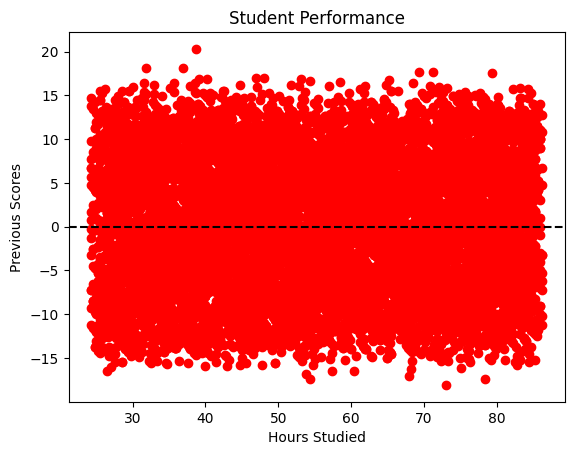

In [28]:
plt.scatter(y_pred_multi, residuals, color="red")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Hours Studied")
plt.ylabel("Previous Scores")
plt.title("Student Performance")
plt.show()

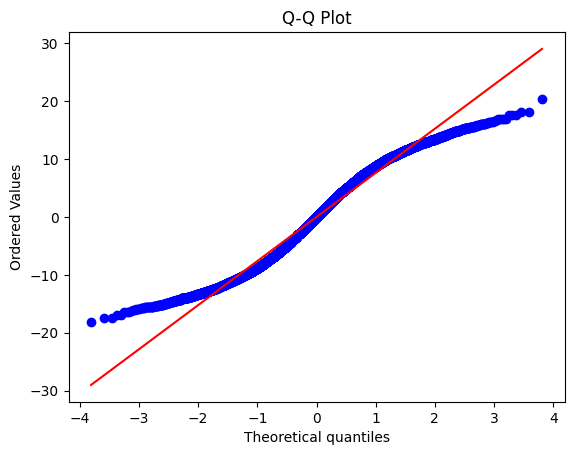

In [26]:
probplot(residuals, dist = "norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()